# Correlation Exercises

Correlation measures the linear relationship between two continuous variables

## Telco Churn Exercise

Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Does tenure correlated with total charges? 
- What happens if you control for phone and internet service?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from env import get_url

## Plan
- Acquire the raw information from the telco_churn database
- Prepare the data for analysis. Double check for missing values and incorrect data types.
- Explore (checking for correlated and non-correlated attributes is a critical part of this step)

In [2]:
sql = """select * from customers
join contract_types using(contract_type_id)
join internet_service_types using(internet_service_type_id)
join payment_types using(payment_type_id)"""

In [3]:
url = get_url("telco_churn")
telco = pd.read_sql(sql, url)
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [4]:
# Check for nulls in the columns of interest
assert telco.total_charges.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding"
assert telco.monthly_charges.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding"
assert telco.tenure.isna().sum() == 0, "There are missing values in this column. Handle them before proceeding"

In [5]:
# Check the datatypes for the columns of interest
telco[["tenure", "monthly_charges", "total_charges"]].dtypes

tenure               int64
monthly_charges    float64
total_charges       object
dtype: object

In [6]:
# Let's see what's happening with the total_charges column...
telco.total_charges.value_counts().head()

20.2     11
         11
19.75     9
20.05     8
19.9      8
Name: total_charges, dtype: int64

In [7]:
# Make the spaces into an empty space
telco.total_charges = telco.total_charges.str.strip()

# remove those 11 rows
telco = telco[telco.total_charges != ""]

# set the total_charges column to be a float|
telco.total_charges = telco.total_charges.astype(float)

### Relationship of Tenure to Monthly Charges
$H_0$ is that there is no linear relationship between these two variables

In [8]:
alpha = .01
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
if p < alpha:
    print("Reject our null hypothesis")
else:
    print("Fail to reject our null hypothesis")

Reject our null hypothesis


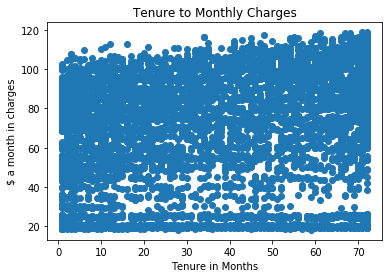

In [9]:
plt.title("Tenure to Monthly Charges")
plt.xlabel("Tenure in Months")
plt.ylabel("$ a month in charges")
plt.scatter(telco.tenure, telco.monthly_charges)
plt.show()

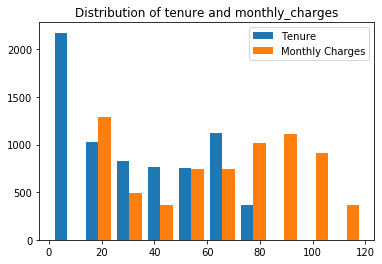

In [10]:
plt.title("Distribution of tenure and monthly_charges")
plt.hist([telco.tenure, telco.monthly_charges], label=["Tenure", "Monthly Charges"])
plt.legend(loc="upper right")
plt.show()

## Relationship of Tenure to Total Charges
$H_0$ is that there is no linear relationship

In [11]:
# pearson's R of tenure and total charges
alpha = .05
r, p = stats.pearsonr(telco.tenure, telco.total_charges)
if p < alpha:
    print("Reject the null")
    print("There is a linear relationship")
else: 
    print("Fail to reject the null")

Reject the null
There is a linear relationship


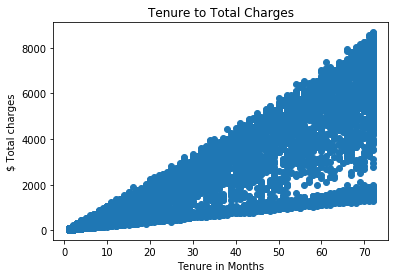

In [12]:
plt.title("Tenure to Total Charges")
plt.xlabel("Tenure in Months")
plt.ylabel("$ Total charges")
plt.scatter(telco.tenure, telco.total_charges)
plt.show()

## Relationship Between Monthly Charges and Total Charges
$H_0$: There is no linear correlation between tenure and monthly charges

In [13]:
alpha = .01 # 1 - .99 confidence level
r, p = stats.pearsonr(telco.monthly_charges, telco.total_charges)

if p < alpha:
    print("Reject our null hypothesis")
    print("R is", r)
    print("p is", p)
else:
    print("Fail to reject our null hypothesis")

Reject our null hypothesis
R is 0.6510648032262024
p is 0.0


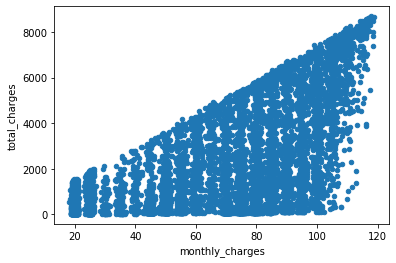

In [14]:
telco.plot.scatter("monthly_charges", "total_charges")

# Let's control for phone and internet service

In [15]:
telco.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [16]:
telco.phone_service.value_counts()

Yes    6352
No      680
Name: phone_service, dtype: int64

In [17]:
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [18]:
# demo pandas profiler